# Data Ukuran Sedang: Product Classification and Clustering dari Kaggle dengan link sebagai berikut:
https://www.kaggle.com/datasets/adilashrafi/product-classification-and-clustering

In [1]:
%pip install pandas scikit-learn numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


- ## Load Dataset
Pada bagian ini kita akan memuat dataset yang sudah kita download sebelumnya.

In [2]:
import pandas as pd

df = pd.read_csv('../data/pricerunner_aggregate.csv')
df

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges


- ## Informasi Struktur DataFrame
Bagian ini menampilkan ringkasan struktur DataFrame, termasuk jumlah baris, nama kolom, jumlah data non-null, tipe data setiap kolom, dan penggunaan memori.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


- ## Cek Missing Value
Pada bagian ini kita akan mengecek apakah ada data yang hilang pada dataset kita.

In [4]:
print(f"Nilai yang hilang:\n{df.isnull().sum()}")

Nilai yang hilang:
Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64


- ## Cek Data Terduplikat
Pada bagian ini kita akan mengecek apakah ada data yang terduplikat pada dataset kita.

In [5]:
print(f"Data yang terduplikat: {df.duplicated().sum()}")

Data yang terduplikat: 0


- ## Visualisasi Outlier pada Fitur Numerik dengan Boxplot
Pada bagian ini, kita akan memvisualisasikan outlier pada setiap fitur numerik menggunakan boxplot untuk membantu identifikasi data ekstrem pada masing-masing fitur.

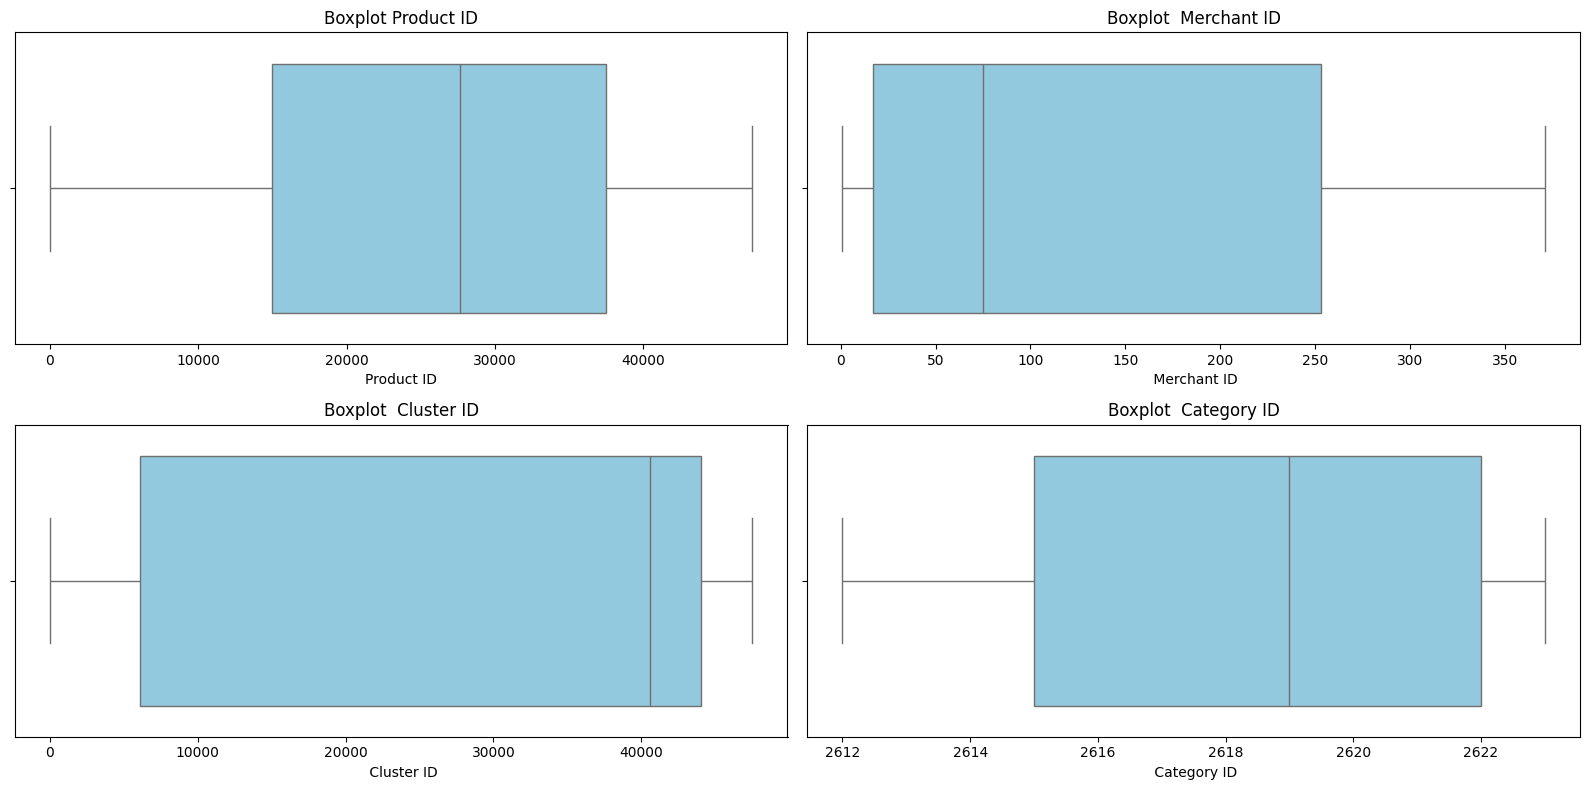

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_indices = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

- ## Label Encoding pada Kolom Kategori
Pada bagian ini, kita akan melakukan label encoding pada beberapa kolom kategori untuk mempersiapkan data sebelum proses modeling.

In [7]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded.columns = df_encoded.columns.str.strip()

cols_to_encode = ['Cluster Label', 'Category Label']

le_dict = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

df_encoded[cols_to_encode].head()


,Cluster Label,Category Label
0,909,7
1,909,7
2,909,7
3,909,7
4,909,7


- ## Normalisasi Data Numerik  
Normalisasi pada kolom numerik menggunakan `StandardScaler` bertujuan agar setiap fitur numerik memiliki skala yang seragam sehingga analisis dan pemodelan menjadi lebih optimal.

In [8]:
from sklearn.preprocessing import StandardScaler

numerical_cols_encoded = [col.strip() for col in numerical_cols if col.strip() in df_encoded.columns]

scaler = StandardScaler()
df_encoded[numerical_cols_encoded] = scaler.fit_transform(df_encoded[numerical_cols_encoded])

df_encoded.head()


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,-1.937309,apple iphone 8 plus 64gb silver,-1.021001,-1.635507,909,-1.706058,7
1,-1.937235,apple iphone 8 plus 64 gb spacegrau,-1.012457,-1.635507,909,-1.706058,7
2,-1.937161,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,-1.003913,-1.635507,909,-1.706058,7
3,-1.937087,apple iphone 8 plus 64gb space grey,-0.995369,-1.635507,909,-1.706058,7
4,-1.937013,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,-0.986825,-1.635507,909,-1.706058,7


- ## Visualisasi Distribusi Data Numerik
Pada bagian ini, kita akan memvisualisasikan distribusi dari setiap fitur numerik menggunakan histogram untuk melihat pola sebaran data setelah proses normalisasi dan penanganan outlier.

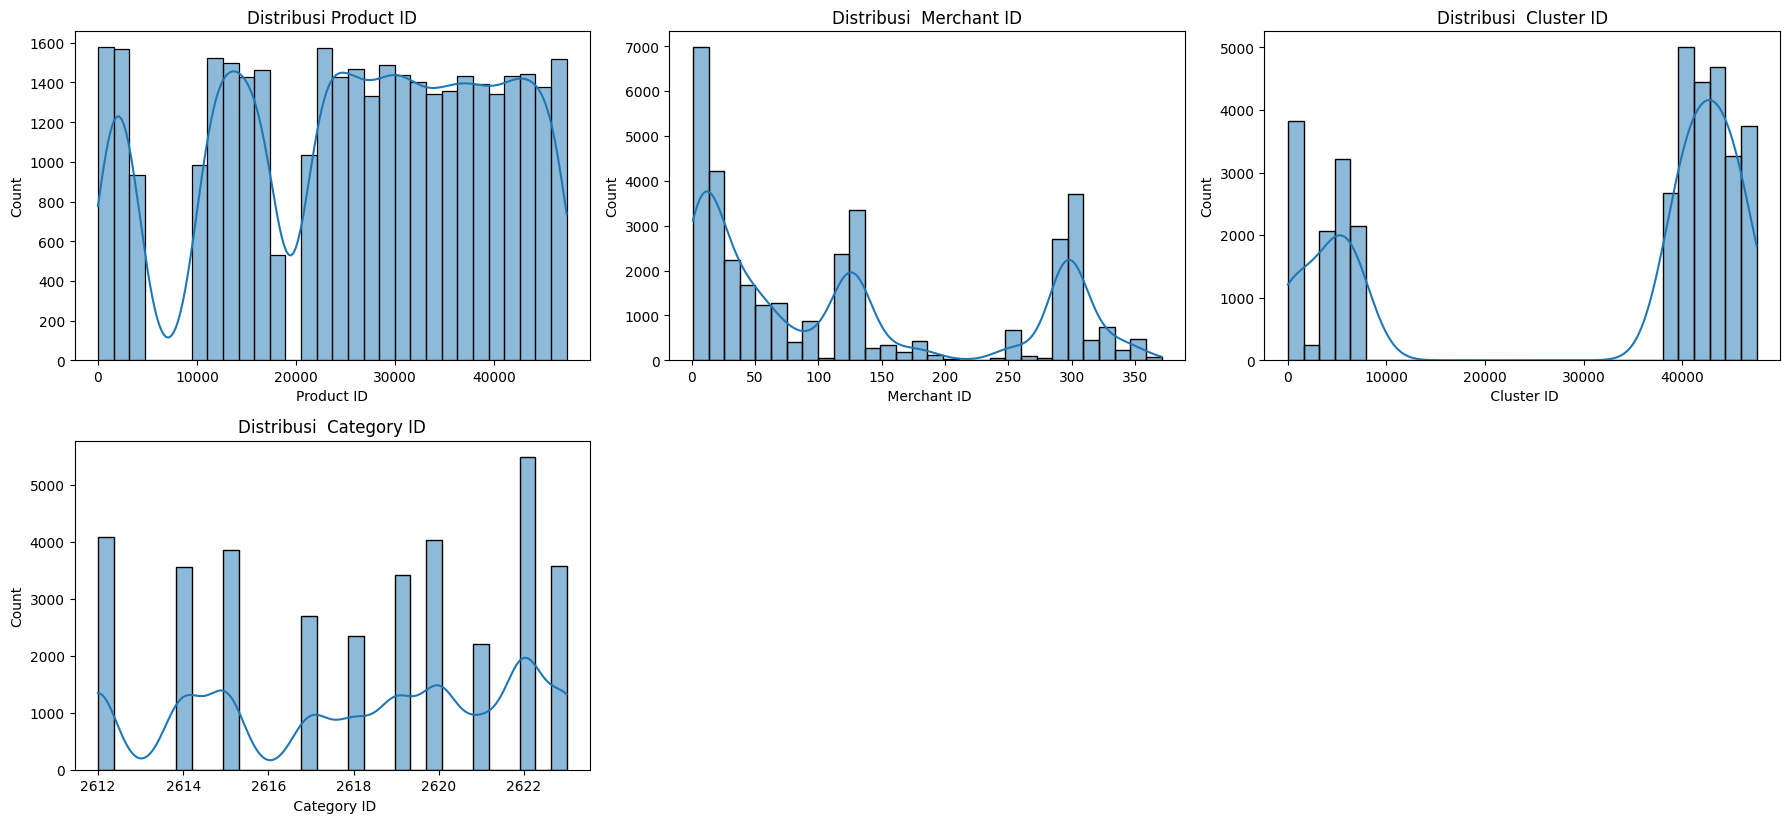

In [9]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

- ## Visualisasi Jumlah Merchant Unik per Kategori
Pada bagian ini, kita akan memvisualisasikan jumlah merchant unik pada setiap kategori (`Merchant ID` per `Category Label`) untuk mengetahui distribusi merchant di berbagai kategori produk.

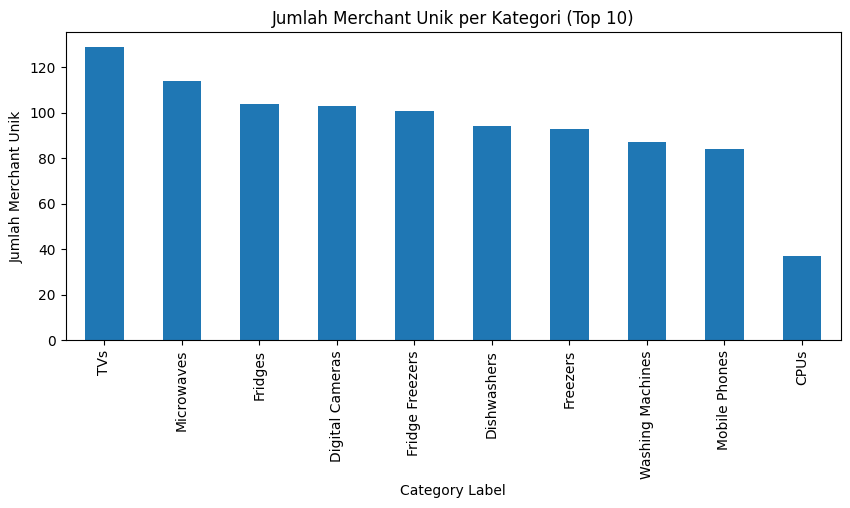

In [10]:
if ' Merchant ID' in df.columns and ' Category Label' in df.columns:
    avg_products = df.groupby(' Category Label')[' Merchant ID'].nunique().sort_values(ascending=False)
    avg_products.head(10).plot(kind='bar', figsize=(10, 4), title='Jumlah Merchant Unik per Kategori (Top 10)')
    plt.ylabel('Jumlah Merchant Unik')
    plt.xlabel('Category Label')
    plt.show()

- ## Korelasi antar Variabel Numerik
Visualisasi analisis hubungan antar fitur numerik menggunakan heatmap korelasi untuk mengidentifikasi pola dan keterkaitan antar variabel.

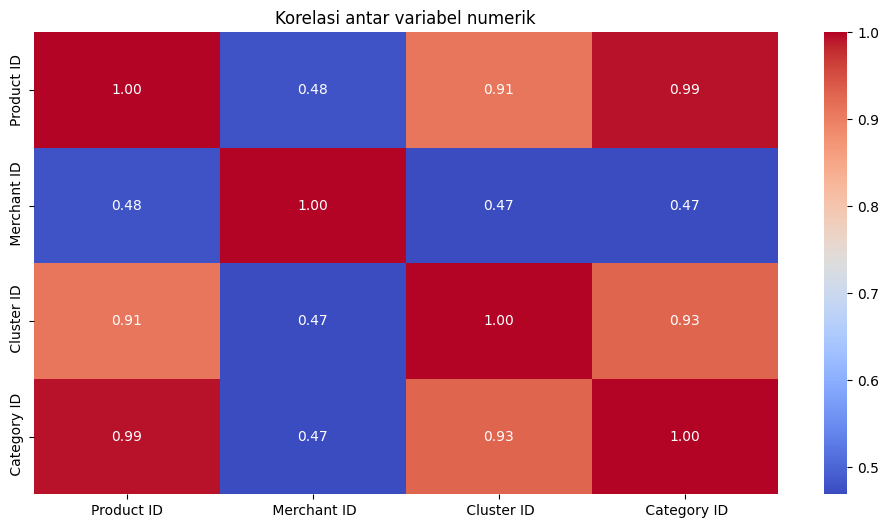

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi antar variabel numerik')
plt.show()

- ## Pembentukan Cluster dengan KMeans
Pada bagian ini, kita akan melakukan clustering pada data menggunakan algoritma KMeans. Data numerik akan digunakan sebagai fitur, dan hasil cluster akan ditambahkan ke dataframe sebagai kolom baru `Cluster`.

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = [' Merchant ID', ' Cluster ID', ' Category ID']
X_cluster = df[features]

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

df['Cluster'] = cluster_labels

print(df['Cluster'].value_counts())

sil_score = silhouette_score(X_cluster, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")


Cluster
0    23804
1    11507
Name: count, dtype: int64
Silhouette Score: 0.9257


- ## Menentukan Jumlah Cluster Optimal dengan Metode Elbow  
Bagian ini menggunakan metode Elbow untuk menentukan jumlah cluster optimal pada data dengan memvisualisasikan nilai inertia untuk berbagai jumlah cluster.

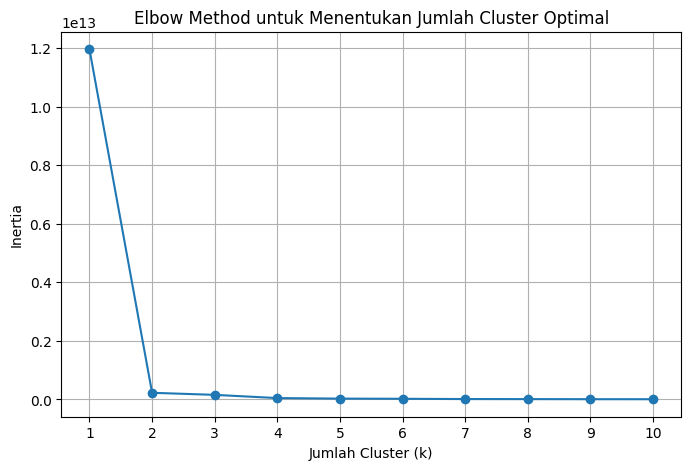

In [13]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42)
    kmeans_tmp.fit(X_cluster)
    inertia.append(kmeans_tmp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(k_range)
plt.grid(True)
plt.show()

- ## Evaluasi Model KMeans Clustering  
Bagian ini menampilkan evaluasi hasil clustering, termasuk jumlah cluster, distribusi anggota tiap cluster, nilai silhouette score, rata-rata Category ID pada tiap cluster, serta visualisasi rata-rata Category ID per cluster.

Evaluasi Model KMeans Clustering
Jumlah cluster: 2
Distribusi anggota tiap cluster:
Cluster
0    23804
1    11507
Name: count, dtype: int64
Silhouette Score: 0.9257

Rata-rata Category ID pada tiap cluster:
Cluster
0    2620.326290
1    2613.626314
Name:  Category ID, dtype: float64


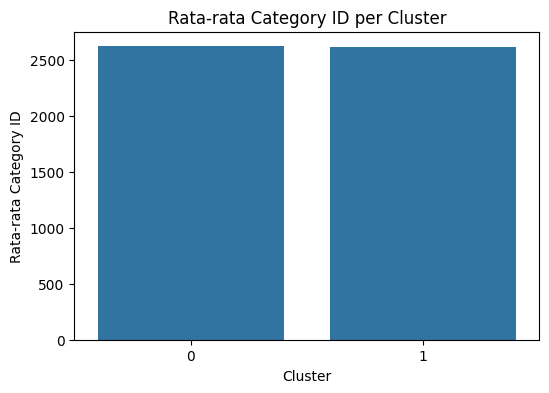

In [ ]:
print("Evaluasi Model KMeans Clustering")
print(f"Jumlah cluster: {n_clusters}")
print(f"Distribusi anggota tiap cluster:\n{df['Cluster'].value_counts()}")
print(f"Silhouette Score: {sil_score:.4f}")

cluster_category_mean = df.groupby('Cluster')[' Category ID'].mean()
print("\nRata-rata Category ID pada tiap cluster:")
print(cluster_category_mean)

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_category_mean.index, y=cluster_category_mean.values)
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Category ID')
plt.title('Rata-rata Category ID per Cluster')
plt.show()

# langkah-langkah clustering
- import library
- load data
- explorasi data analysisi
 1. univariate=mengetahui distribusi setiap kolomnya
 2. multivariate=mengetahui hubungan antar variabel(cth=korelasi variabel,dll)
- preprocessing data
 1. missing value
 2. duplicate
 3. outlier
 4. encoding
 5. standarisasi
- pembentukan model
- Training model
- evaluasi model
opsional
- hyper parameter tunning(jika model evaluasinya jelek)
- evaluasi model ketika sudah di hyperparameter tunning
